In [1]:
# Step 1: Understanding the Problem & Data Loading

import pandas as pd

# Load the dataset
file_path =  (r"C:\Users\150LAB\Downloads\Micro-credit-Data-file.csv") # Update the path if needed
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check for duplicate records
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")

# Check class distribution of the target variable (defaulters vs non-defaulters)
print("\nClass Distribution (Loan Repayment Status):")
print(df['label'].value_counts(normalize=True))


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 no

In [2]:
# Step 2: Data Cleaning and Preprocessing

# Drop unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 0', 'msisdn'])

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Verify dataset shape after cleaning
print(f"Dataset shape after cleaning: {df_cleaned.shape}")

# Check for missing values again
print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())


Dataset shape after cleaning: (209562, 35)

Missing Values After Cleaning:
label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64


C:\Users\150LAB\AppData\Local\Temp\ipykernel_10536\1416222581.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df_cleaned, palette="viridis")


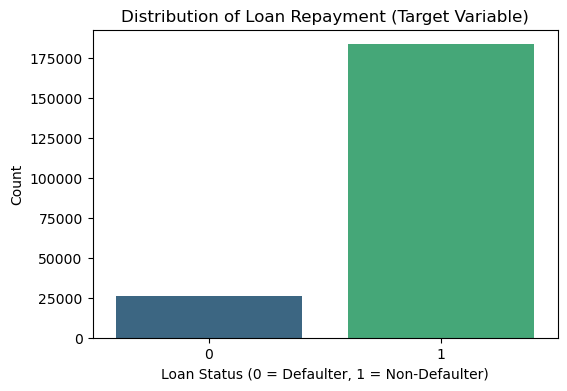


Class Distribution (Loan Repayment Status):
label
1    0.875297
0    0.124703
Name: proportion, dtype: float64


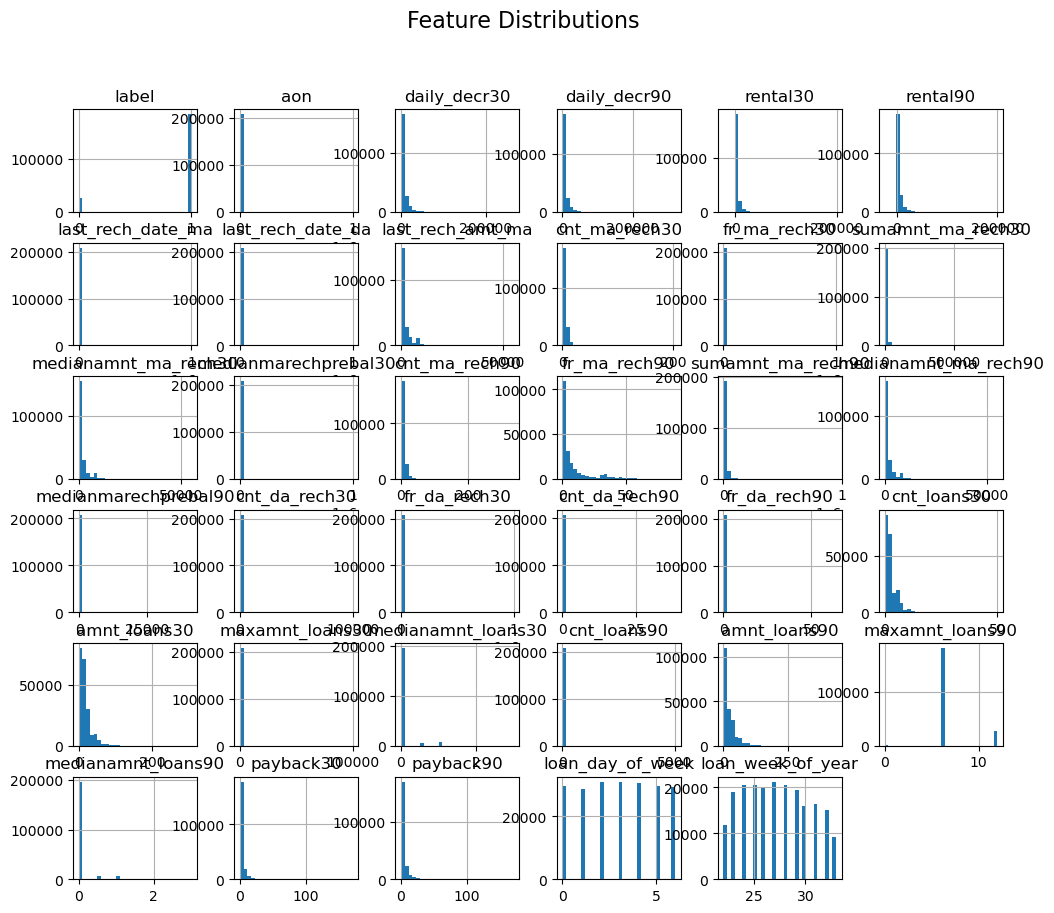

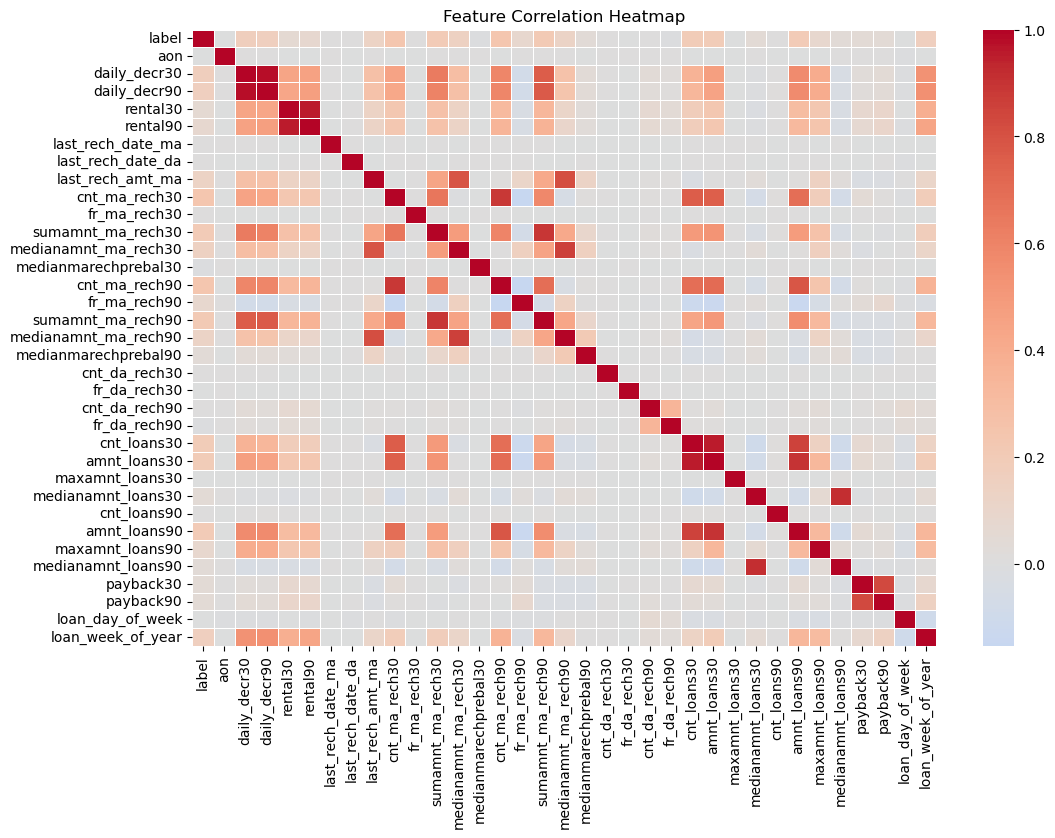

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check if 'pdate' exists before processing
if 'pdate' in df_cleaned.columns:
    # Convert 'pdate' to datetime format
    df_cleaned['pdate'] = pd.to_datetime(df_cleaned['pdate'])

    # Extract new numerical features from 'pdate'
    df_cleaned['loan_day_of_week'] = df_cleaned['pdate'].dt.dayofweek  # Monday=0, Sunday=6
    df_cleaned['loan_week_of_year'] = df_cleaned['pdate'].dt.isocalendar().week  # Week number

    # Drop the original 'pdate' column
    df_cleaned = df_cleaned.drop(columns=['pdate'])
else:
    print("Column 'pdate' not found. Skipping date-based feature extraction.")

# 1. Target Variable Distribution (Check for Class Imbalance)
plt.figure(figsize=(6, 4))
sns.countplot(x="label", data=df_cleaned, palette="viridis")
plt.title("Distribution of Loan Repayment (Target Variable)")
plt.xlabel("Loan Status (0 = Defaulter, 1 = Non-Defaulter)")
plt.ylabel("Count")
plt.show()

# Print class distribution percentages
print("\nClass Distribution (Loan Repayment Status):")
print(df_cleaned['label'].value_counts(normalize=True))

# 2. Feature Distributions (Detect Outliers & Skewness)
df_cleaned.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 3. Correlation Analysis (Detect Highly Correlated Features)
# Convert categorical column 'pcircle' into numeric format using one-hot encoding
df_numeric = pd.get_dummies(df_cleaned, columns=['pcircle'], drop_first=True)

# Compute the correlation matrix
correlation_matrix = df_numeric.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [4]:
import numpy as np

# 1. Create New Features
df_cleaned['loan_to_recharge_ratio_30'] = df_cleaned['amnt_loans30'] / (df_cleaned['sumamnt_ma_rech30'] + 1)
df_cleaned['loan_to_recharge_ratio_90'] = df_cleaned['amnt_loans90'] / (df_cleaned['sumamnt_ma_rech90'] + 1)
df_cleaned['average_recharge_amount_30'] = df_cleaned['sumamnt_ma_rech30'] / (df_cleaned['cnt_ma_rech30'] + 1)
df_cleaned['average_recharge_amount_90'] = df_cleaned['sumamnt_ma_rech90'] / (df_cleaned['cnt_ma_rech90'] + 1)

# 2. Handle Infinite and NaN values (caused by division)
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cleaned.fillna(0, inplace=True)

# 3. Remove Highly Correlated Features
features_to_drop = [
    'daily_decr90', 'rental90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 
    'cnt_ma_rech90', 'fr_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 
    'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback90'
]
df_cleaned = df_cleaned.drop(columns=features_to_drop)

# 4. Verify the final dataset
print(f"Final dataset shape after feature engineering: {df_cleaned.shape}")
df_cleaned.head()


Final dataset shape after feature engineering: (209562, 28)


,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,payback30,pcircle,loan_day_of_week,loan_week_of_year,loan_to_recharge_ratio_30,loan_to_recharge_ratio_90,average_recharge_amount_30,average_recharge_amount_90
0,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,...,0.0,2.0,29.000000,UPW,2,29,0.003897,0.003897,1026.000,1026.000000
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,...,0.0,1.0,0.000000,UPW,2,32,0.002073,0.002073,2893.500,2893.500000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,...,0.0,1.0,0.000000,UPW,4,33,0.003896,0.003896,769.500,769.500000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,...,0.0,2.0,0.000000,UPW,0,23,12.000000,0.012658,0.000,473.500000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,...,0.0,7.0,2.333333,UPW,2,25,0.002097,0.001787,2503.625,2610.666667


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, precision_score, recall_score
import pandas as pd

# 1. One-Hot Encode Categorical Columns
df_encoded = pd.get_dummies(df_cleaned, columns=['pcircle'], drop_first=True)

# 2. Split Features and Target
X = df_encoded.drop(columns=['label'])  # Features
y = df_encoded['label']  # Target Variable

# 3. Split into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Apply Standard Scaling (Only on Numeric Features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate models
def train_evaluate_model(model, model_name):
    model.fit(X_train_scaled, y_train)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities
    y_pred = model.predict(X_test_scaled)  # Class predictions
    
    logloss = log_loss(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Log Loss: {logloss:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    return model

# 5. Train and Evaluate Models
logistic_model = train_evaluate_model(LogisticRegression(class_weight='balanced', max_iter=1000), "Logistic Regression")
rf_model = train_evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")
xgb_model = train_evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), "XGBoost")



Logistic Regression Performance:
Log Loss: 0.5358
Precision: 0.9592
Recall: 0.7037

Random Forest Performance:
Log Loss: 0.2376
Precision: 0.9340
Recall: 0.9781


C:\Users\150LAB\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:53:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Log Loss: 0.1901
Precision: 0.9397
Recall: 0.9742


In [6]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, precision_score, recall_score
import time

# Function to evaluate models
def evaluate_model(model, model_name):
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    y_pred = model.predict(X_test_scaled)

    logloss = log_loss(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"\n{model_name} Performance After Tuning:")
    print(f"Log Loss: {logloss:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

# 1. Train a Tuned Random Forest
start_time = time.time()

rf_best = RandomForestClassifier(
    n_estimators=150,  # Moderate number of trees
    max_depth=15,  # Balanced depth
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_best.fit(X_train_scaled, y_train)

print(f"Random Forest Training Time: {time.time() - start_time:.2f} seconds")
evaluate_model(rf_best, "Random Forest (Optimized)")

# 2. Train a Tuned XGBoost Model
start_time = time.time()

xgb_best = XGBClassifier(
    learning_rate=0.1,
    n_estimators=150,  # Balanced number of boosting rounds
    max_depth=6,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_best.fit(X_train_scaled, y_train)

print(f"XGBoost Training Time: {time.time() - start_time:.2f} seconds")
evaluate_model(xgb_best, "XGBoost (Optimized)")


Random Forest Training Time: 38.97 seconds

Random Forest (Optimized) Performance After Tuning:
Log Loss: 0.2048
Precision: 0.9294
Recall: 0.9835


C:\Users\150LAB\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:53:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Training Time: 0.86 seconds

XGBoost (Optimized) Performance After Tuning:
Log Loss: 0.1890
Precision: 0.9387
Recall: 0.9769


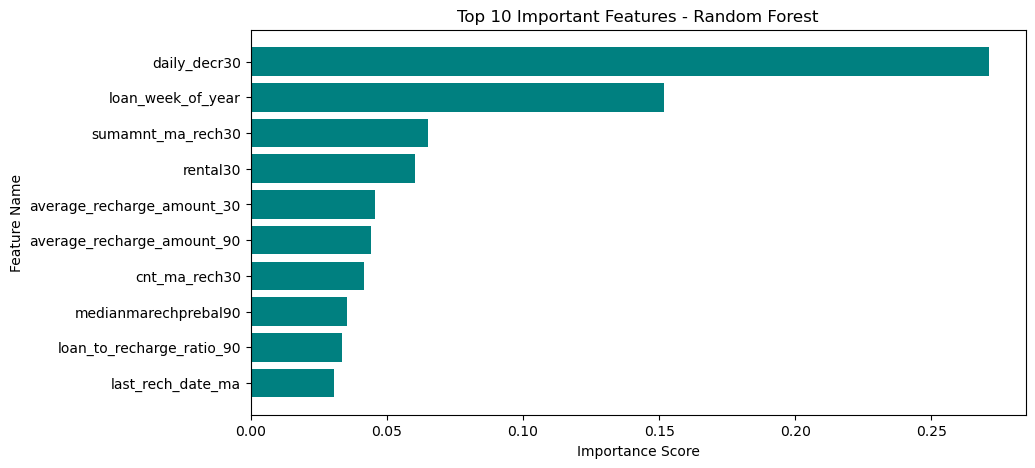

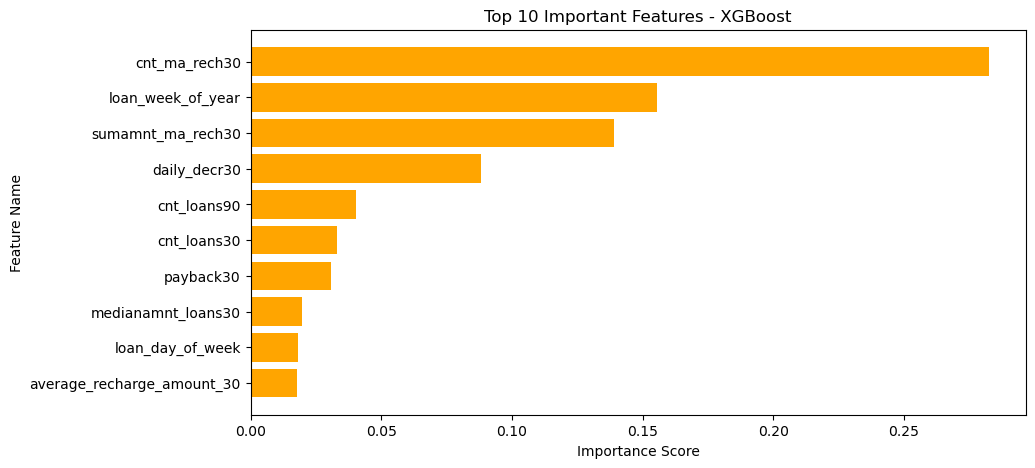

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Extract feature importance from Random Forest
rf_feature_importance = rf_best.feature_importances_
rf_features = np.array(X.columns)

# Sort features by importance
rf_sorted_idx = np.argsort(rf_feature_importance)[::-1]

# Plot Feature Importance for Random Forest
plt.figure(figsize=(10, 5))
plt.barh(rf_features[rf_sorted_idx][:10], rf_feature_importance[rf_sorted_idx][:10], color="teal")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features - Random Forest")
plt.gca().invert_yaxis()
plt.show()

# 2. Extract feature importance from XGBoost
xgb_feature_importance = xgb_best.feature_importances_
xgb_features = np.array(X.columns)

# Sort features by importance
xgb_sorted_idx = np.argsort(xgb_feature_importance)[::-1]

# Plot Feature Importance for XGBoost
plt.figure(figsize=(10, 5))
plt.barh(xgb_features[xgb_sorted_idx][:10], xgb_feature_importance[xgb_sorted_idx][:10], color="orange")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 10 Important Features - XGBoost")
plt.gca().invert_yaxis()
plt.show()


In [8]:
import joblib

# 1. Choose the Best Model (Based on Log Loss & Recall)
best_model = xgb_best  # Change to rf_best if Random Forest performs better

# 2. Save the Best Model
joblib.dump(best_model, "best_loan_repayment_model.pkl")
print("Best model saved successfully!")

# 3. Load the Saved Model
loaded_model = joblib.load("best_loan_repayment_model.pkl")
print("Model loaded successfully!")

# 4. Make Predictions Using the Loaded Model
sample_data = X_test_scaled[:5]  # Take first 5 test samples
predictions = loaded_model.predict(sample_data)
predictions_proba = loaded_model.predict_proba(sample_data)[:, 1]

print("\nSample Predictions:")
print(predictions)
print("\nSample Probabilities:")
print(predictions_proba)


Best model saved successfully!
Model loaded successfully!

Sample Predictions:
[1 1 1 0 1]

Sample Probabilities:
[0.7623989  0.9999275  0.92096984 0.34807456 0.8553268 ]


In [9]:
import numpy as np

# 1. Load the Best Model
loaded_model = joblib.load("best_loan_repayment_model.pkl")

# 2. Select Sample Data from Test Set
sample_data = X_test_scaled[:5]  # Taking first 5 samples from the test set

# 3. Make Predictions
predictions = loaded_model.predict(sample_data)  # 0 = Defaulter, 1 = Non-Defaulter
predictions_proba = loaded_model.predict_proba(sample_data)[:, 1]  # Probability of paying back

# 4. Display Predictions
for i in range(len(sample_data)):
    print(f"Sample {i+1}:")
    print(f"  - Predicted Class: {'Non-Defaulter (1)' if predictions[i] == 1 else 'Defaulter (0)'}")
    print(f"  - Probability of Repayment: {predictions_proba[i]:.4f}")
    print("-" * 40)


Sample 1:
  - Predicted Class: Non-Defaulter (1)
  - Probability of Repayment: 0.7624
----------------------------------------
Sample 2:
  - Predicted Class: Non-Defaulter (1)
  - Probability of Repayment: 0.9999
----------------------------------------
Sample 3:
  - Predicted Class: Non-Defaulter (1)
  - Probability of Repayment: 0.9210
----------------------------------------
Sample 4:
  - Predicted Class: Defaulter (0)
  - Probability of Repayment: 0.3481
----------------------------------------
Sample 5:
  - Predicted Class: Non-Defaulter (1)
  - Probability of Repayment: 0.8553
----------------------------------------
